<a href="https://colab.research.google.com/github/Raizel820/Inferential_Statistics/blob/master/Inferential_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import subprocess as sp
import sys,os,shutil,pickle,time
from os.path import join
# mount Google Drive
from os.path import expanduser
gd_path=join(expanduser("~"),'gd')
if not os.path.isdir(gd_path):
    try:
        # load Google Drive
        from google.colab import drive,files
        drive.mount('/drive')
        sp.call('ln -s /drive/My\ Drive '+gd_path, shell=True)
    except:
        print('unable to find Google Drive Folder')
os.chdir(gd_path+'/MachineLearning/car_data')
os.listdir('.')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


['craigslistVehicles_full.csv', 'cars_cleaned.csv']

In [0]:
import pandas as pd

In [5]:
df = pd.read_csv('cars_cleaned.csv')
df.sample(5)

,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
162375,4995,2003.0,nissan,murano,good,6 cylinders,gas,90697.0,clean,automatic,fwd,full-size,SUV,grey
150584,7890,2009.0,gmc,acadia,good,6 cylinders,gas,118626.0,clean,automatic,4wd,full-size,other,black
142193,10900,2014.0,dodge,journey,good,8 cylinders,gas,79100.0,clean,automatic,fwd,full-size,SUV,orange
279053,6950,2004.0,toyota,highlander,excellent,6 cylinders,gas,156100.0,clean,automatic,4wd,mid-size,SUV,red
272506,25499,2013.0,jeep,wrangler unlimited sahara,excellent,6 cylinders,gas,62601.0,clean,automatic,4wd,full-size,SUV,green


In [0]:
round(df.describe(), 0)

,price,year,odometer
count,375332.0,375332.0,375332.0
mean,14370.0,2010.0,104711.0
std,11010.0,6.0,58064.0
min,750.0,1986.0,1005.0
25%,5995.0,2007.0,58676.0
50%,11850.0,2011.0,101364.0
75%,19875.0,2015.0,143842.0
max,99999.0,2020.0,299999.0


In [0]:
sorted(df)

['condition',
 'cylinders',
 'drive',
 'fuel',
 'make',
 'manufacturer',
 'odometer',
 'paint_color',
 'price',
 'size',
 'title_status',
 'transmission',
 'type',
 'year']

In [0]:
round(df[['price', 'condition']].groupby(['condition']).describe(), 2)

price                      ...                           
              count      mean       std  ...      50%      75%      max
condition                                ...                           
excellent  153863.0  14492.84  10079.87  ...  11995.0  18995.0  99975.0
fair        21728.0   6448.94   6204.25  ...   4003.0   8500.0  85000.0
good        95136.0  10988.28   8818.59  ...   7999.0  15900.0  99997.0
like new    67102.0  22397.07  12569.97  ...  19995.0  28999.0  99999.0
new          3448.0  30019.38  14791.83  ...  28999.5  37455.0  99500.0
salvage     34055.0  10913.53   8114.61  ...   8400.0  14498.0  85000.0

[6 rows x 8 columns]

In [0]:
a= df[['odometer', 'drive']].groupby(['drive']).describe()
round(a,1)

odometer                     ...                              
          count      mean      std  ...       50%       75%       max
drive                               ...                              
4wd    172552.0  108591.1  58921.0  ...  105565.5  148000.0  299950.0
fwd    134170.0   99976.8  55391.5  ...   97388.0  138000.0  299999.0
rwd     68610.0  104209.4  60252.1  ...   99653.0  144705.0  299950.0

[3 rows x 8 columns]

In [0]:
!pip install -q researchpy

In [0]:
import researchpy as rp
from scipy import stats

In [0]:
rp.summary_cont(df.groupby("drive")['odometer'])

,N,Mean,SD,SE,95% Conf.,Interval
drive,,,,,,
4wd,172552,108591.132053,58920.994163,141.843705,108313.117585,108869.146521
fwd,134170,99976.766483,55391.453078,151.222025,99680.370210,100273.162756
rwd,68610,104209.385250,60252.134990,230.026955,103758.529132,104660.241368


In [0]:
sorted(df)

['condition',
 'cylinders',
 'drive',
 'fuel',
 'make',
 'manufacturer',
 'odometer',
 'paint_color',
 'price',
 'size',
 'title_status',
 'transmission',
 'type',
 'year']

In [0]:
rp.summary_cat(df[['type','condition','manufacturer' ]])

,Variable,Outcome,Count,Percent
0,type,SUV,96594,25.74
1,,sedan,94954,25.30
2,,pickup,51675,13.77
3,,truck,46149,12.30
4,,coupe,19645,5.23
5,,hatchback,13643,3.63
6,,wagon,11853,3.16
7,,other,11574,3.08
8,,van,10460,2.79
9,,convertible,9306,2.48


In [0]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,price,year,odometer
price,1,0.57,-0.54
year,0.57,1,-0.61
odometer,-0.54,-0.61,1


##### To further examine the relationship between state_fips and weather, Let's graph the two variables on a scatter plot

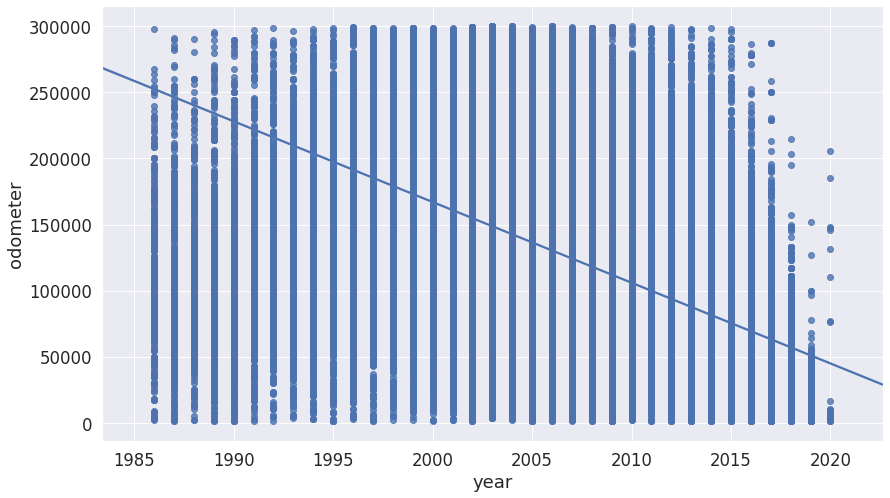

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,8)) # set the size of the graph
_ = sns.regplot(data=df, x='year', y='odometer')

##Box and Whisker's Plot

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

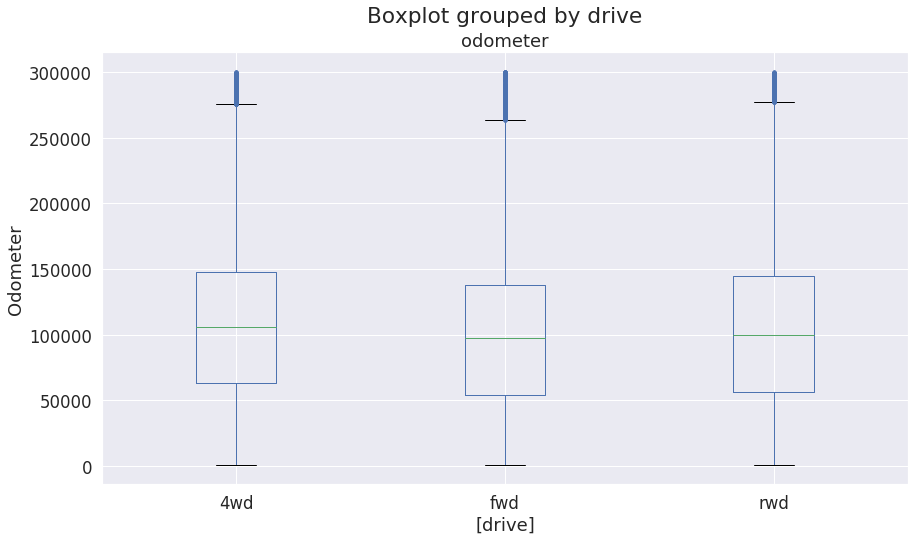

In [0]:
fig, ax = plt.subplots(figsize=(14,8))

ax.set_ylabel('Odometer')

# boxplot with only these two variables
_ = df[['drive', 'odometer']].boxplot(by='drive', figsize=(13,8), vert=True, sym='b.', ax=ax)


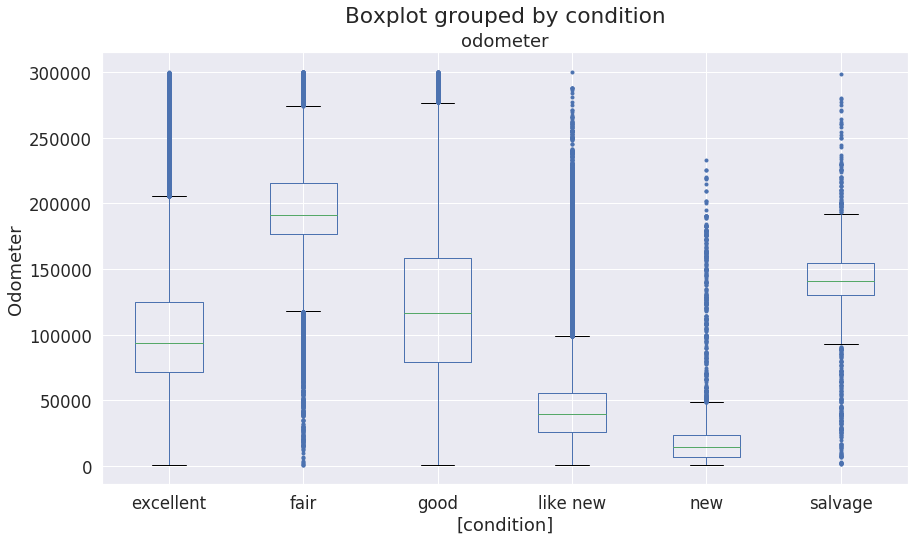

In [0]:
fig, ax = plt.subplots(figsize=(14,8))

ax.set_ylabel('Odometer')

# boxplot with only these two variables
_ = df[['condition', 'odometer']].boxplot(by='condition', figsize=(13,8), vert=True, sym='b.', ax=ax)


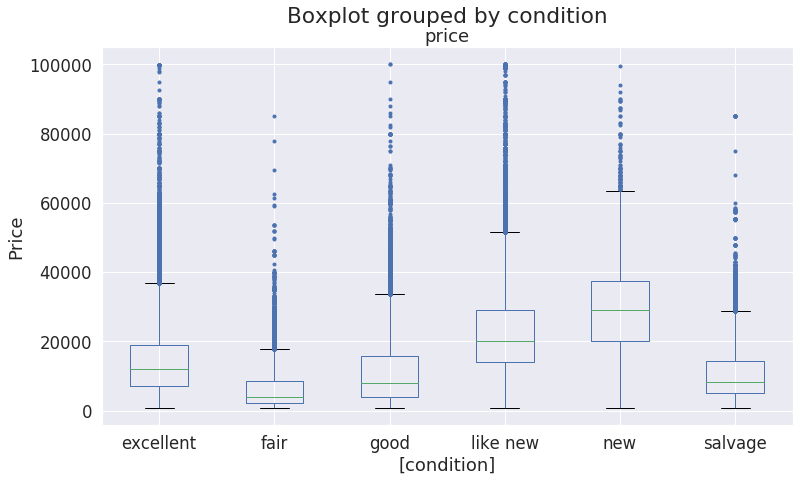

In [0]:
fig, ax = plt.subplots(figsize=(12,7))

ax.set_ylabel('Price')

# boxplot with only these two variables
_ = df[['condition', 'price']].boxplot(by='condition', figsize=(13,8), vert=True, sym='b.', ax=ax)

### Chi-square Test of Independence using Researchpy

In [0]:
list(df)

['price',
 'year',
 'manufacturer',
 'make',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color']

In [0]:
table, results = rp.crosstab(df['condition'], df['drive'], prop= 'col', test= 'chi-square')
    
table

drive                        
              4wd     fwd     rwd     All
condition                                
excellent   41.16   40.42   41.70   40.99
fair         6.50    4.97    5.62    5.79
good        22.96   26.83   28.45   25.35
like new    17.97   18.44   16.53   17.88
new          1.11    0.83    0.62    0.92
salvage     10.30    8.51    7.08    9.07
All        100.00  100.00  100.00  100.00

In [0]:
results

,Chi-square test,results
0,Pearson Chi-square ( 10.0) =,1970.5873
1,p-value =,0.0000
2,Cramer's V =,0.0512


#### Chi-square says that there is a significant relationship between variables, but it does not say just how significant and important this is. Cramer's V is a post-test to give this additional information.

#### Cramer's V varies between 0 and 1. Close to 0 it shows little association between variables. Close to 1, it indicates a strong association.

In [0]:
table, results = rp.crosstab(df['condition'], df['title_status'], prop= 'col', test= 'chi-square')
    
table

title_status                                                   
                 clean    lien missing parts only rebuilt salvage     All
condition                                                                
excellent        40.97   50.78    8.79       8.70   42.69   34.76   40.99
fair              5.85    2.38   18.68      30.43    3.00    7.40    5.79
good             25.25   26.82   65.38      21.74   27.32   27.63   25.35
like new         17.79   17.78    2.75       2.17   22.06   18.43   17.88
new               0.92    1.06    0.00       0.00    0.58    1.04    0.92
salvage           9.22    1.19    4.40      36.96    4.36   10.74    9.07
All             100.00  100.00  100.00     100.00  100.00  100.00  100.00

In [0]:
results

,Chi-square test,results
0,Pearson Chi-square ( 25.0) =,1187.5763
1,p-value =,0.0000
2,Cramer's V =,0.0252


In [0]:
df.dtypes

price             int64
year            float64
manufacturer     object
make             object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
dtype: object

## Independent T-test

#### Assumption Check
#####Homogeneity of variances


In [0]:
stats.levene(df['odometer'], df['price'])

LeveneResult(statistic=476848.9025602449, pvalue=0.0)


The Levene test is not significant meaning there is homogeneity of variances and we can proceed. If the test were to be significant, a viable alternative would be to conduct a Welch’s t-test. 

In [0]:
import numpy, pandas, researchpy
researchpy.ttest(df['odometer'], df['price'])

(   Variable         N           Mean  ...         SE      95% Conf.       Interval
 0  odometer  375332.0  104710.777922  ...  94.775980  104525.019815  104896.536029
 1     price  375332.0   14369.864176  ...  17.970772   14334.641996   14405.086357
 2  combined  750664.0   59540.321049  ...  71.024267   59401.115820   59679.526278
 
 [3 rows x 7 columns],                  Independent t-test      results
 0  Difference (odometer - price) =    90340.9137
 1             Degrees of freedom =   750662.0000
 2                              t =      936.5180
 3          Two side test p value =        0.0000
 4         Difference > 0 p value =        1.0000
 5         Difference < 0 p value =        0.0000
 6                      Cohen's d =        2.1618
 7                      Hedge's g =        2.1618
 8                  Glass's delta =        1.5559
 9                              r =        0.7340)

In [0]:
# We can store them as objects. This is different, and better representation of the table above. 
des, res = researchpy.ttest(df['odometer'], df['price'])

des


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,odometer,375332.0,104710.777922,58063.883772,94.775980,104525.019815,104896.536029
1,price,375332.0,14369.864176,11009.676056,17.970772,14334.641996,14405.086357
2,combined,750664.0,59540.321049,61536.041054,71.024267,59401.115820,59679.526278


In [0]:
res

,Independent t-test,results
0,Difference (odometer - price) =,90340.9137
1,Degrees of freedom =,750662.0000
2,t =,936.5180
3,Two side test p value =,0.0000
4,Difference > 0 p value =,1.0000
5,Difference < 0 p value =,0.0000
6,Cohen's d =,2.1618
7,Hedge's g =,2.1618
8,Glass's delta =,1.5559
9,r =,0.7340


### Normal distribution of residuals

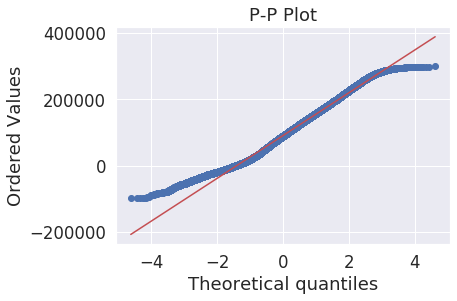

In [0]:

diff = df['odometer'] - df['price']

from scipy import stats
import matplotlib.pyplot as plt

stats.probplot(diff, plot= plt)
plt.title('P-P Plot') 
plt.savefig('Residuals.png')

The p-p plot shows that the data doesn't satisfy normality. We have problem with initial values. May be, filtering data can solve this issue.

In [0]:
import numpy as np
u = np.mean(df["odometer"])
s = np.std(df["price"])
data_filtered = df[(df["odometer"]>(u-2*s)) & (df["price"]<(u+2*s))]

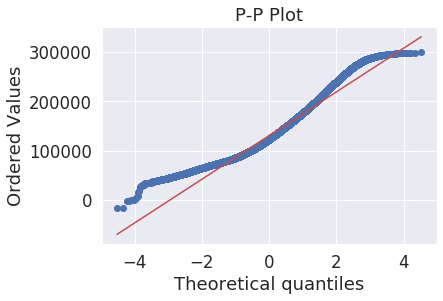

In [0]:
diff = data_filtered['odometer'] - data_filtered['price']

from scipy import stats
import matplotlib.pyplot as plt

stats.probplot(diff, plot= plt)
plt.title('P-P Plot') 
plt.savefig('Residuals.png')

In [0]:
## This is slightly better than the previous situation but we still have violation of the normality assumption here.

In [0]:
stats.shapiro(diff)


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.95795738697052, 0.0)

The output is not labeled, but the first value is the W test statistic and the second value is the p-value. Since the test statistic produce a significant p-value, the data is indicated to be not normally distributed.

In [0]:
len(data_filtered)

232857

## Independent t-test using researchpy

In [0]:
descriptives, results = rp.ttest(data_filtered['odometer'], data_filtered['price'])

round(descriptives,1)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,odometer,232857.0,140457.9,42121.0,87.3,140286.8,140629.0
1,price,232857.0,10079.0,7941.8,16.5,10046.8,10111.3
2,combined,465714.0,75268.5,71890.8,105.3,75062.0,75475.0


In [0]:
round(results,2)

,Independent t-test,results
0,Difference (odometer - price) =,130378.87
1,Degrees of freedom =,465712.00
2,t =,1467.80
3,Two side test p value =,0.00
4,Difference > 0 p value =,1.00
5,Difference < 0 p value =,0.00
6,Cohen's d =,4.30
7,Hedge's g =,4.30
8,Glass's delta =,3.10
9,r =,0.91


Examine 'condition'

In [0]:
condition_summary= rp.summary_cont(df.groupby('condition')['price'])
round(condition_summary,2)

,N,Mean,SD,SE,95% Conf.,Interval
condition,,,,,,
excellent,153863,14492.84,10079.87,25.70,14442.47,14543.20
fair,21728,6448.94,6204.25,42.09,6366.44,6531.44
good,95136,10988.28,8818.59,28.59,10932.24,11044.32
like new,67102,22397.07,12569.97,48.53,22301.96,22492.18
new,3448,30019.38,14791.83,251.91,29525.57,30513.19
salvage,34055,10913.53,8114.61,43.97,10827.34,10999.71


In [0]:
import pandas as pd
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
import matplotlib.pyplot as plt

Anova with '*price*' and '*condition*'

In [0]:
results = ols('price ~ condition', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                 1.609e+04
Date:                Sun, 01 Dec 2019   Prob (F-statistic):               0.00
Time:                        07:43:51   Log-Likelihood:            -3.9892e+06
No. Observations:              375332   AIC:                         7.978e+06
Df Residuals:                  375326   BIC:                         7.978e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.449e+04     25.471    568.988      0.000    1.44e+04    1.45e+04
condition[T.fair]     -8043.8959     72.409   -111.090      0.000   -8185.815   -7901.977
condition[T.good]     -3504.5525     41.208    -85.046      0.000   -3585.318   -3423.787
condition[T.like new]  7904.2310     46.221    171.008      0.000    7813.638    7994.824
condition[T.new]       1.553e+04    172.047     90.246      0.000    1.52e+04    1.59e+04
condition[T.salvage]  -3579.3074     59.833    -59.821      0.000   -3696.579   -3462.036
==============================================================================
Omnibus:                   107916.846   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           366108.310
Skew:                           1.447   Prob(JB):                         0.00
Kurtosis:                       6.877   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
aov_table = sm.stats.anova_lm(results, typ=2)
round(aov_table,2)

,sum_sq,df,F,PR(>F)
condition,8.028506e+12,5.0,16085.35,0.0
Residual,3.746648e+13,375326.0,NaN,NaN


In [0]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
condition,8.028506e+12,5.0,1.605701e+12,16085.350615,0.0,0.17647,0.176459
Residual,3.746648e+13,375326.0,9.982383e+07,NaN,NaN,NaN,NaN


**Assumption Checks/Model Diagnostics**

In [0]:
results.diagn

{'condno': 11.178017556895455,
 'jb': 366108.3097744294,
 'jbpv': 0.0,
 'kurtosis': 6.87718673015906,
 'mineigval': 3362.6008157969295,
 'omni': 107916.846063097,
 'omnipv': 0.0,
 'skew': 1.447206710299098}

These are the same diagnostics from the bottom of the regression table from before. The Durban-Watson tests is to detect the presence of autocorrelation (not provided when calling diagnostics this way), Jarque-Bera (jb; jbpv is p-value) tests the assumption of normality, Omnibus (omni; omnipv is p-value) tests the assumption of homogeneity of variance, and the Condition Number (condno) assess multicollinearity. Condition Number values over 20 are indicative of multicollinearity.

In [0]:
stats.shapiro(results.resid)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9053595066070557, 0.0)